## Load in dataset with options

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

np.set_printoptions(suppress=True)

df = pd.read_csv("/kaggle/input/2015-deidentified-ny-inpatient-discharge-sparcs/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2015.csv", dtype={10: str}) # This dataset has 2,346,760 rows and 37 columns

df.loc[df['Length of Stay'] == '120 +', 'Length of Stay'] = 120
df['Length of Stay']=df['Length of Stay'].astype(int)

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows',300)
pd.set_option('display.max_columns',150)

## Clean data & create model compatible data

In [2]:
df2 = df.drop(columns=['Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility Id', 'Facility Name',
       'Zip Code - 3 digits',
       'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
       'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Payment Typology 1', 'Payment Typology 2', 'Payment Typology 3',
       'Attending Provider License Number',
       'Operating Provider License Number', 'Other Provider License Number',
       'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator'])

df2 = df2.dropna()

df2["Total Charges"] = df2["Total Charges"].str.replace("$", "")
df2["Total Costs"] = df2["Total Costs"].str.replace("$", "")
df2["Total Charges"] = df2["Total Charges"].astype(float)
df2["Total Costs"] = df2["Total Costs"].astype(float)

df3 = pd.get_dummies(df2,drop_first=True)
df3 = df3.dropna()
df3.head()

,Length of Stay,Total Charges,Total Costs,Age Group_18 to 29,Age Group_30 to 49,Age Group_50 to 69,Age Group_70 or Older,Gender_M,Gender_U,Race_Multi-racial,Race_Other Race,Race_White,Ethnicity_Not Span/Hispanic,Ethnicity_Spanish/Hispanic,Ethnicity_Unknown
0,5,5620.00,4561.28,False,False,True,False,False,False,False,False,True,True,False,False
1,8,7404.18,6933.94,True,False,False,False,False,False,False,False,True,True,False,False
2,8,7931.28,7154.85,False,True,False,False,True,False,False,False,True,True,False,False
3,4,11304.44,4584.11,False,False,True,False,False,False,False,False,True,True,False,False
4,3,8330.50,4361.74,False,False,True,False,True,False,False,False,True,True,False,False


## Create Visuals

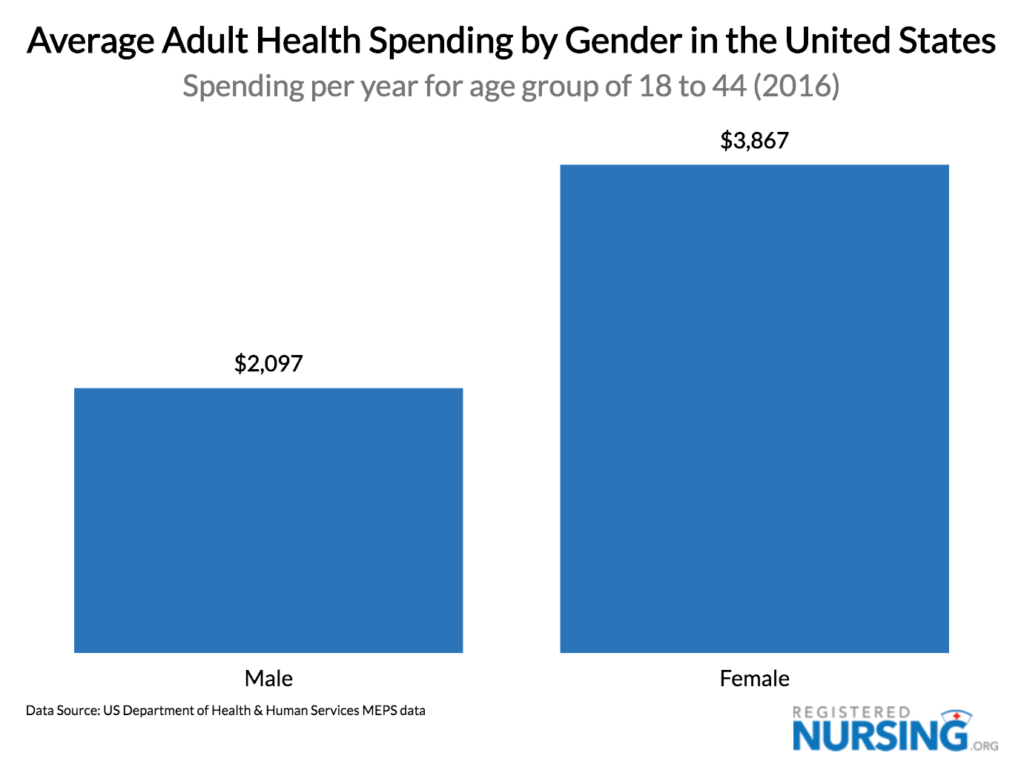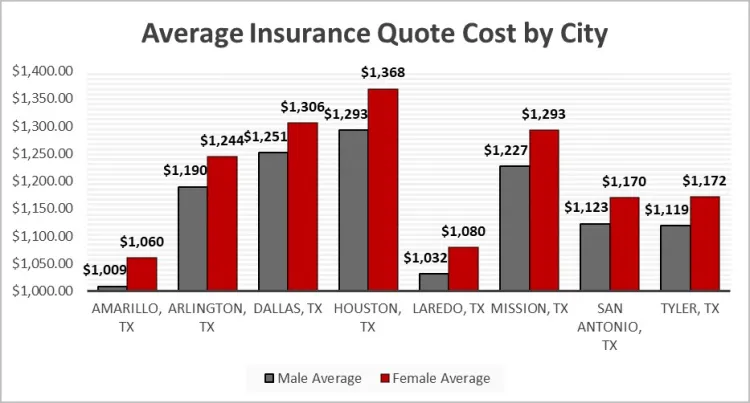

In [3]:
# https://www.machinelearningplus.com/machine-learning/exploratory-data-analysis-eda/

def autopct_format(pct):
    # Show percentage only if it is greater than 2%
    return ('%1.1f%%' % pct) if pct > 2 else ''

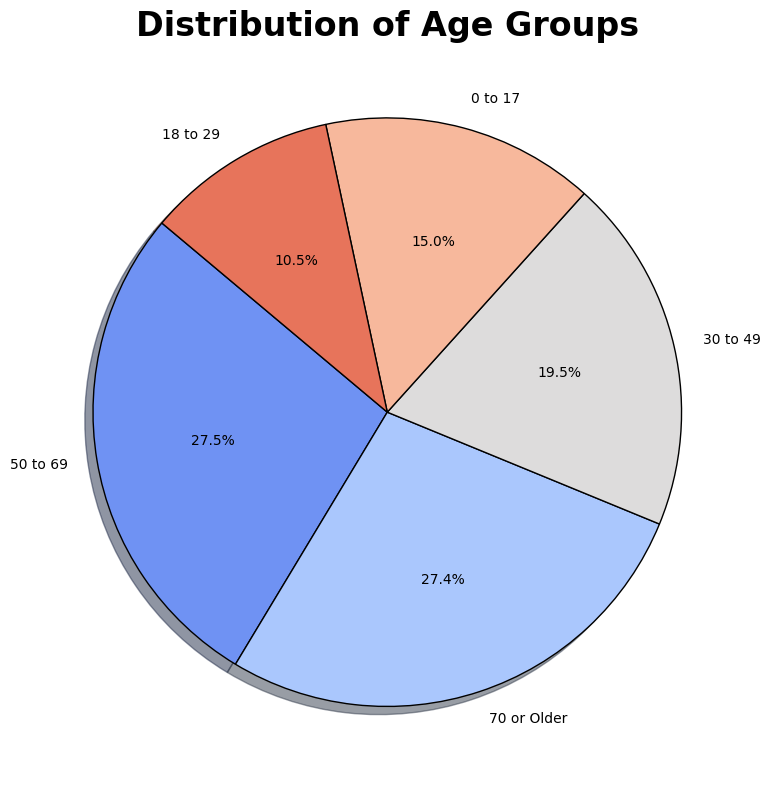

In [4]:
# Completed

age_group_counts = df2['Age Group'].value_counts()
colors = sns.color_palette("coolwarm", len(age_group_counts))

plt.figure(figsize=(10, 8))
plt.pie(
    age_group_counts, 
    labels=age_group_counts.index, 
    autopct=autopct_format, 
    startangle=140, 
    colors=colors,
    wedgeprops={'edgecolor': 'black'},
    shadow=True
)

plt.title('Distribution of Age Groups', fontsize=24, fontweight='bold')

plt.savefig("age_groups.png")
plt.tight_layout()
plt.show()

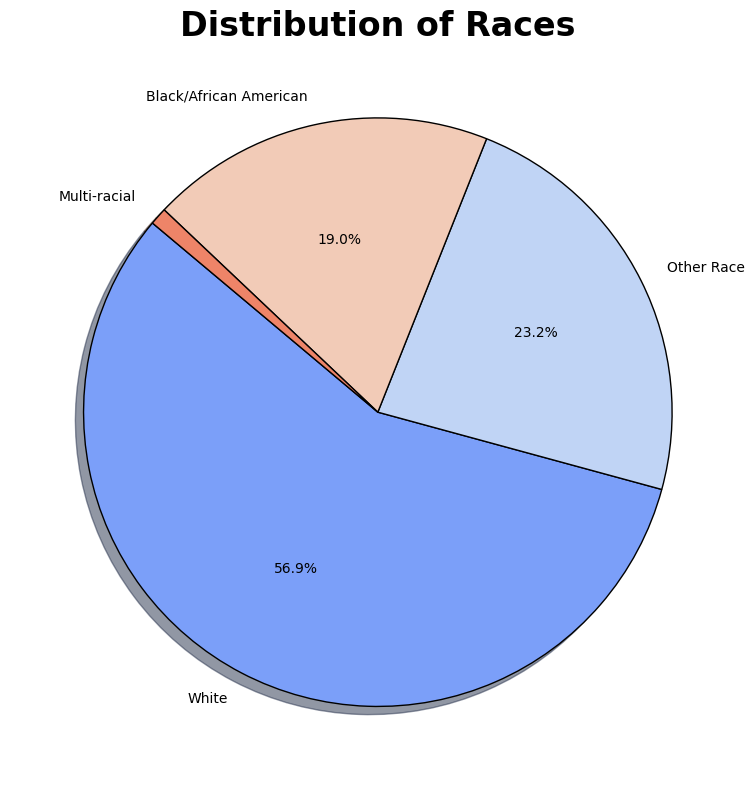

In [5]:
# Completed

race_group_counts = df2['Race'].value_counts()
colors = sns.color_palette("coolwarm", len(race_group_counts))

plt.figure(figsize=(10, 8))
plt.pie(
    race_group_counts, 
    labels=race_group_counts.index, 
    autopct=autopct_format, 
    startangle=140, 
    colors=colors,
    wedgeprops={'edgecolor': 'black'},
    shadow=True
)

plt.title('Distribution of Races', fontsize=24, fontweight='bold')

plt.savefig("races.png")
plt.tight_layout()
plt.show()

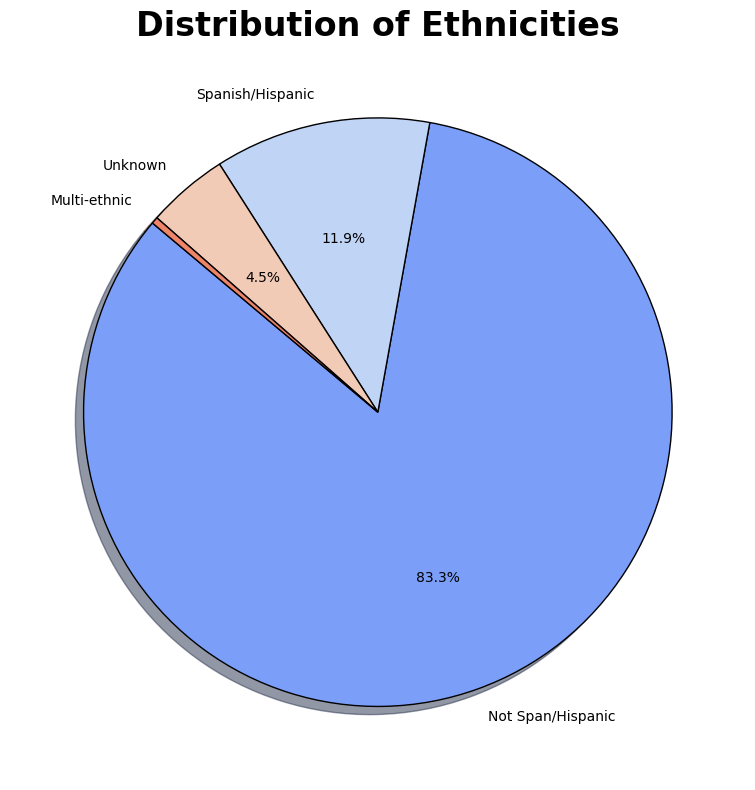

In [6]:
# Completed

ethnicity_group_counts = df2['Ethnicity'].value_counts()
colors = sns.color_palette("coolwarm", len(ethnicity_group_counts))

plt.figure(figsize=(10, 8))
plt.pie(
    ethnicity_group_counts, 
    labels=ethnicity_group_counts.index, 
    autopct=autopct_format, 
    startangle=140, 
    colors=colors,
    wedgeprops={'edgecolor': 'black'},
    shadow=True
)

plt.title('Distribution of Ethnicities', fontsize=24, fontweight='bold')

plt.savefig("ethnicities.png")
plt.tight_layout()
plt.show()

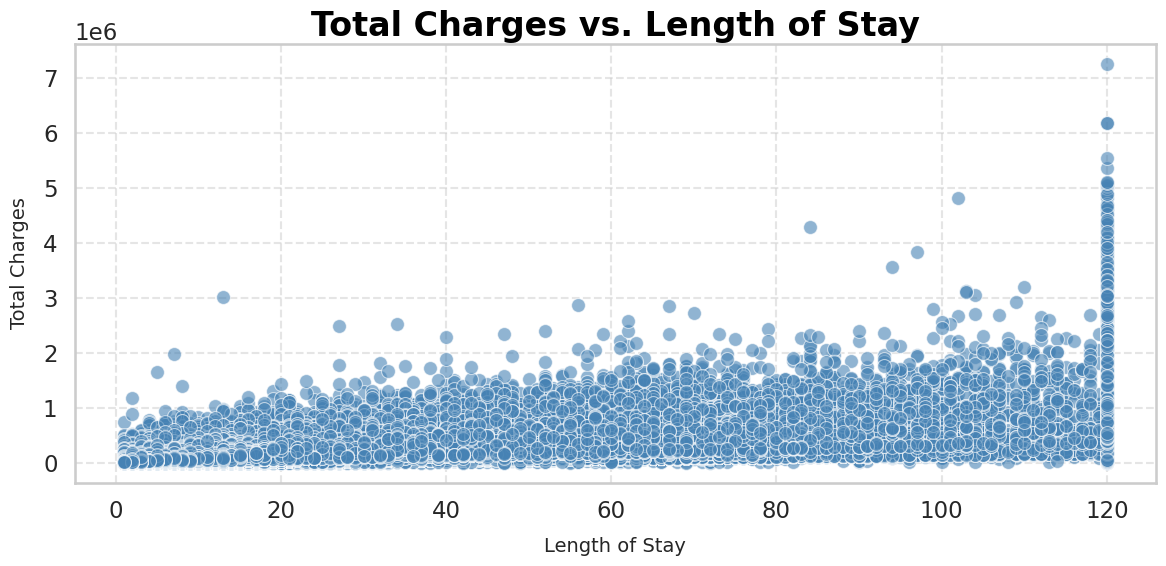

In [7]:
# Completed

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.set_context("talk")

scatter_plot = sns.scatterplot(
    data=df3, x="Length of Stay", y="Total Charges", palette="coolwarm", color="#4682B4", s=100, alpha=0.6
)

plt.title("Total Charges vs. Length of Stay", fontsize=24, fontweight="bold", color="black")
plt.xlabel("Length of Stay", fontsize=14, labelpad=10)
plt.ylabel("Total Charges", fontsize=14, labelpad=10)

plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig("total_charges_length_of_stay.png")
plt.tight_layout()
plt.show()

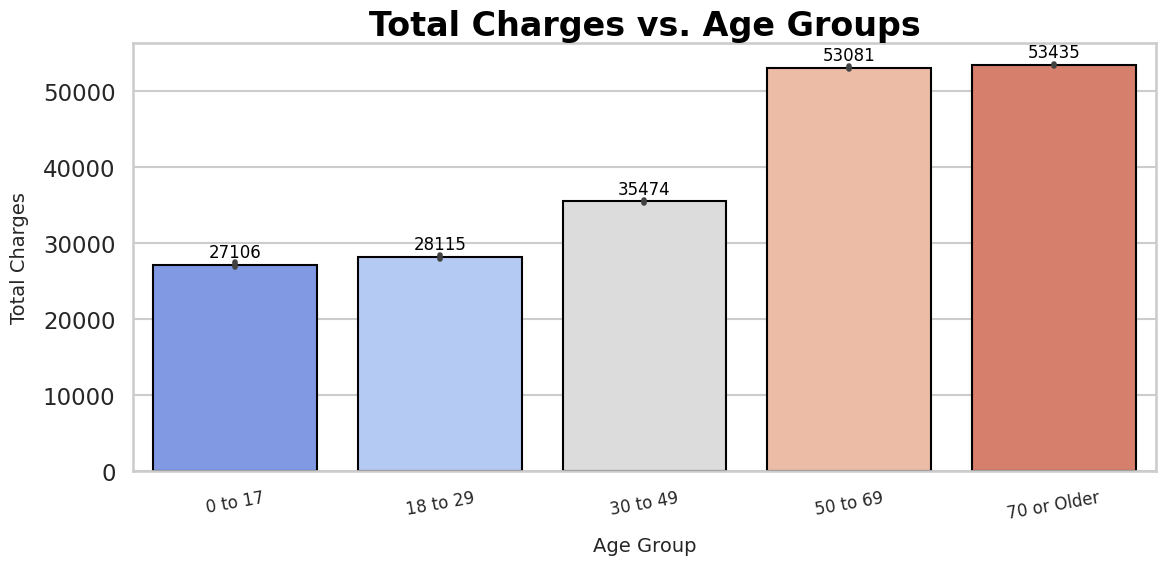

In [8]:
# Completed

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.set_context("talk")

age_group_order = ["0 to 17", "18 to 29", "30 to 49", "50 to 69", "70 or Older"]
ageVCharge = sns.barplot(
    data=df2, x="Age Group", y="Total Charges", palette="coolwarm", edgecolor="black", order=age_group_order
)

plt.title("Total Charges vs. Age Groups", fontsize=24, fontweight='bold', color='black')
plt.xlabel("Age Group", fontsize=14, labelpad=10)
plt.ylabel("Total Charges", fontsize=14, labelpad=10)

plt.xticks(rotation=10, fontsize=12)

for p in ageVCharge.patches:
    ageVCharge.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2., p.get_height() + 500),
        ha="center", va="bottom",
        fontsize=12, color="black"
    )

plt.savefig("total_charges_age_groups.png")
plt.tight_layout()
plt.show()

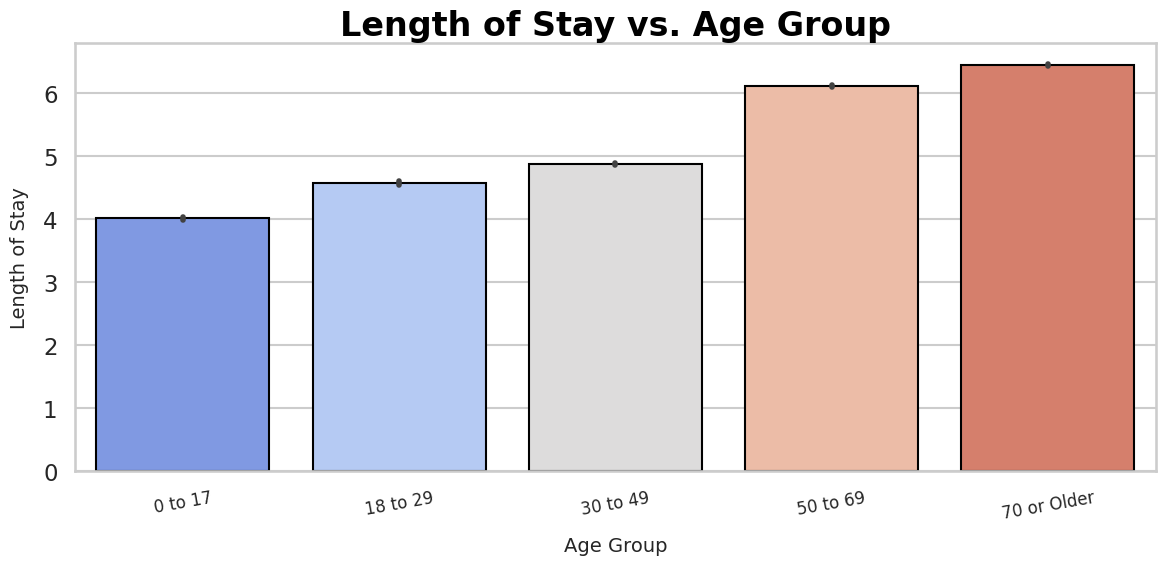

In [9]:
# Completed

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.set_context("talk")

age_group_order = ["0 to 17", "18 to 29", "30 to 49", "50 to 69", "70 or Older"]
ageVCharge = sns.barplot(
    data=df2, x="Age Group", y="Length of Stay", palette="coolwarm", edgecolor="black", order=age_group_order
)

plt.title("Length of Stay vs. Age Group", fontsize=24, fontweight='bold', color='black')
plt.xlabel("Age Group", fontsize=14, labelpad=10)
plt.ylabel("Length of Stay", fontsize=14, labelpad=10)

plt.xticks(rotation=10, fontsize=12)

for p in ageVCharge.patches:
    ageVCharge.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2., p.get_height() + 500),
        ha="center", va="bottom",
        fontsize=12, color="black"
    )

plt.savefig("length_of_stay_age_groups.png")
plt.tight_layout()
plt.show()

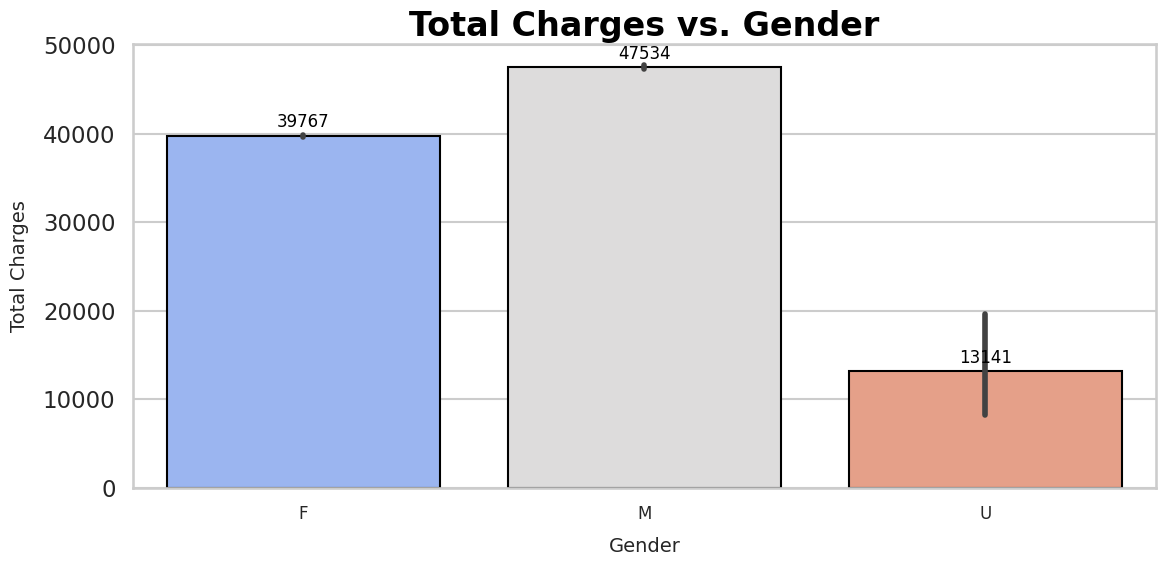

In [10]:
# Completed

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.set_context("talk")

genderVCharge = sns.barplot(
    data=df2, x="Gender", y="Total Charges", palette="coolwarm", edgecolor="black"
)

plt.title("Total Charges vs. Gender", fontsize=24, fontweight='bold', color='black')
plt.xlabel("Gender", fontsize=14, labelpad=10)
plt.ylabel("Total Charges", fontsize=14, labelpad=10)

plt.xticks(rotation=0, fontsize=12)

for p in genderVCharge.patches:
    genderVCharge.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2., p.get_height() + 500),
        ha="center", va="bottom",
        fontsize=12, color="black"
    )

plt.savefig("total_charges_gender.png")
plt.tight_layout()
plt.show()

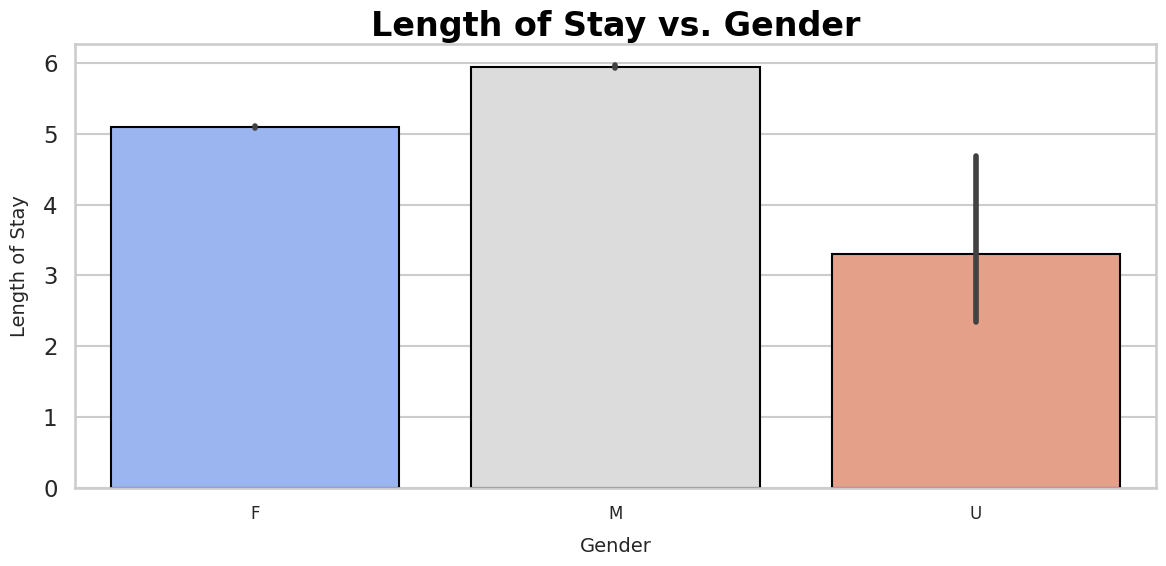

In [11]:
# Completed

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.set_context("talk")

genderVLength = sns.barplot(
    data=df2, x="Gender", y="Length of Stay", palette="coolwarm", edgecolor="black"
)

plt.title("Length of Stay vs. Gender", fontsize=24, fontweight='bold', color='black')
plt.xlabel("Gender", fontsize=14, labelpad=10)
plt.ylabel("Length of Stay", fontsize=14, labelpad=10)

plt.xticks(rotation=0, fontsize=12)

for p in genderVLength.patches:
    genderVLength.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2., p.get_height() + 500),
        ha="center", va="bottom",
        fontsize=12, color="black"
    )

plt.savefig("length_of_stay_gender.png")
plt.tight_layout()
plt.show()

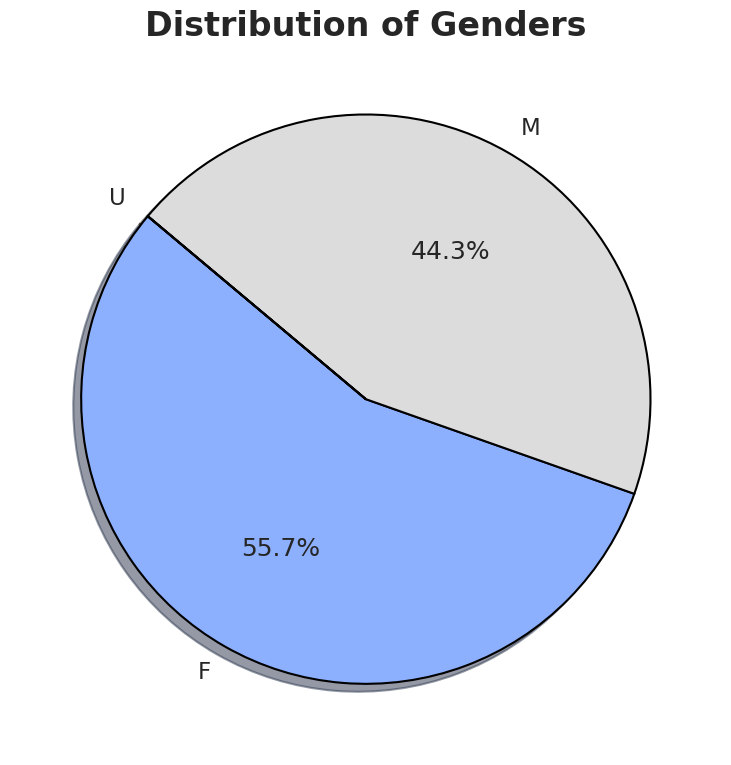

In [12]:
# Completed

gender_group_counts = df2['Gender'].value_counts()
colors = sns.color_palette("coolwarm", len(gender_group_counts))

plt.figure(figsize=(10, 8))
plt.pie(
    gender_group_counts, 
    labels=gender_group_counts.index, 
    autopct=autopct_format, 
    startangle=140, 
    colors=colors,
    wedgeprops={'edgecolor': 'black'},
    shadow=True
)

plt.title('Distribution of Genders', fontsize=24, fontweight='bold')

plt.savefig("genders.png")
plt.tight_layout()
plt.show()

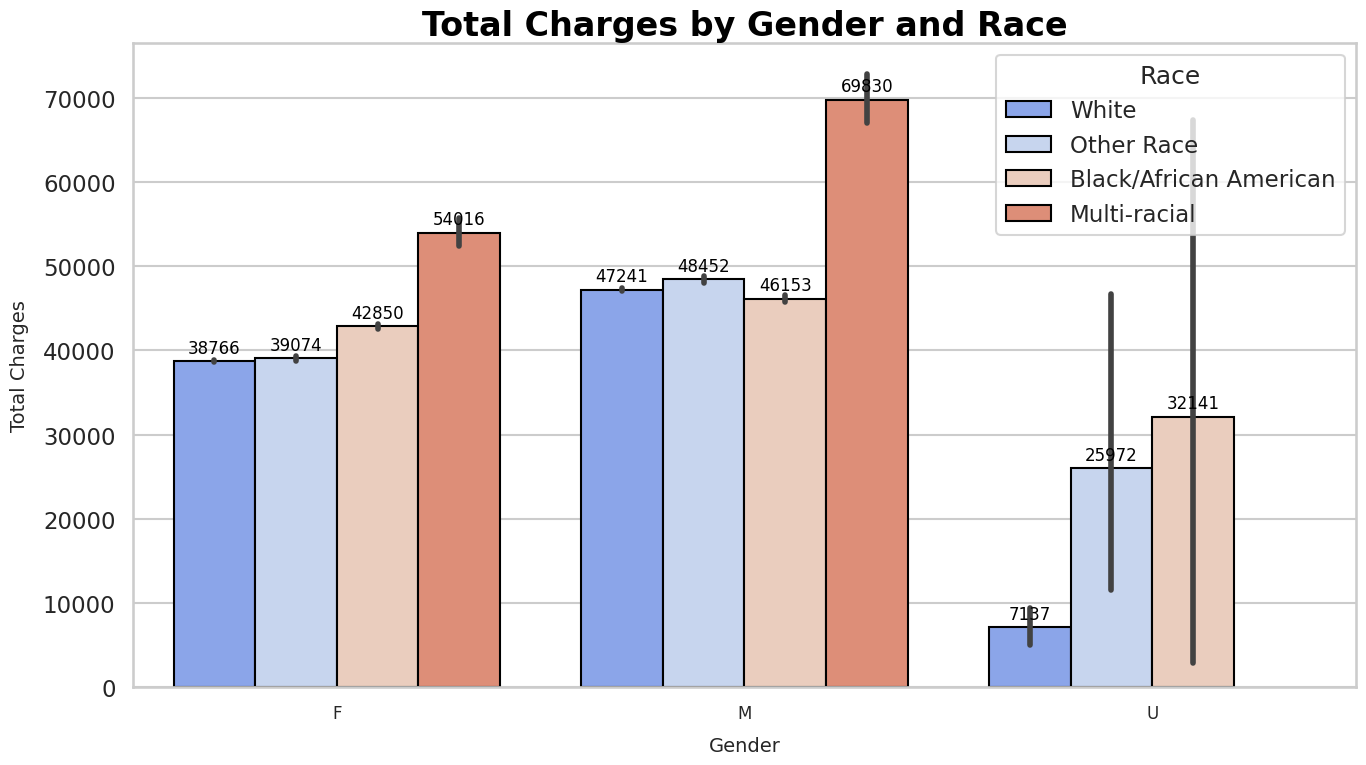

In [13]:
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
sns.set_context("talk")

gender_race_charges_chart = sns.barplot(
    data=df2, 
    x="Gender", 
    y="Total Charges", 
    hue="Race",
    palette="coolwarm", 
    edgecolor="black"
)

plt.title("Total Charges by Gender and Race", fontsize=24, fontweight='bold', color='black')
plt.xlabel("Gender", fontsize=14, labelpad=10)
plt.ylabel("Total Charges", fontsize=14, labelpad=10)

plt.xticks(rotation=0, fontsize=12)

for p in gender_race_charges_chart.patches:
    if p.get_height() > 0:
        gender_race_charges_chart.annotate(
            format(p.get_height(), ".0f"),
            (p.get_x() + p.get_width() / 2., p.get_height() + 500),
            ha="center", va="bottom",
            fontsize=12, color="black"
        )

plt.savefig("total_charges_gender_and_race.png")
plt.tight_layout()
plt.show()

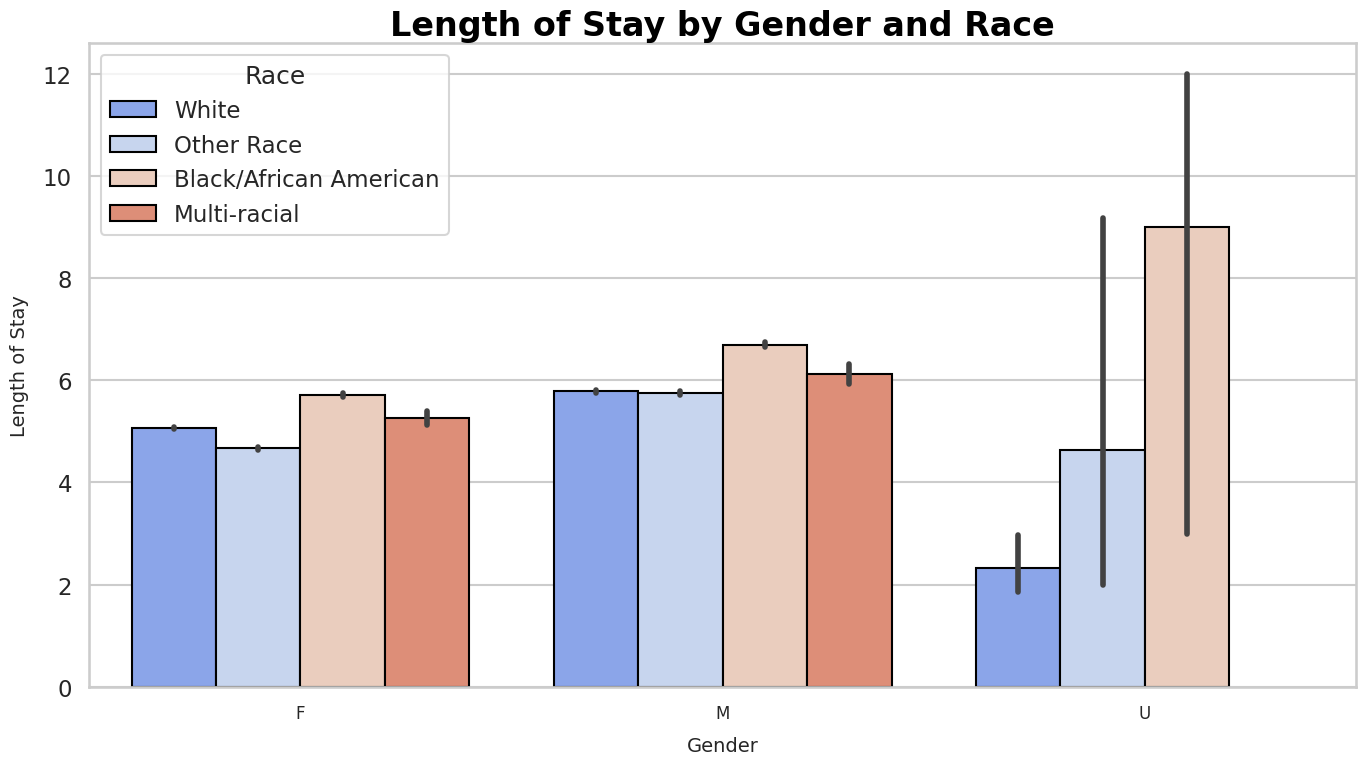

In [14]:
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
sns.set_context("talk")

gender_race_length_of_stay_chart = sns.barplot(
    data=df2, 
    x="Gender", 
    y="Length of Stay", 
    hue="Race",
    palette="coolwarm", 
    edgecolor="black"
)

plt.title("Length of Stay by Gender and Race", fontsize=24, fontweight='bold', color='black')
plt.xlabel("Gender", fontsize=14, labelpad=10)
plt.ylabel("Length of Stay", fontsize=14, labelpad=10)

plt.xticks(rotation=0, fontsize=12)

for p in gender_race_length_of_stay_chart.patches:
    if p.get_height() > 0:
        gender_race_length_of_stay_chart.annotate(
            format(p.get_height(), ".0f"),
            (p.get_x() + p.get_width() / 2., p.get_height() + 500),
            ha="center", va="bottom",
            fontsize=12, color="black"
        )

plt.savefig("length_of_stay_gender_and_race.png")
plt.tight_layout()
plt.show()

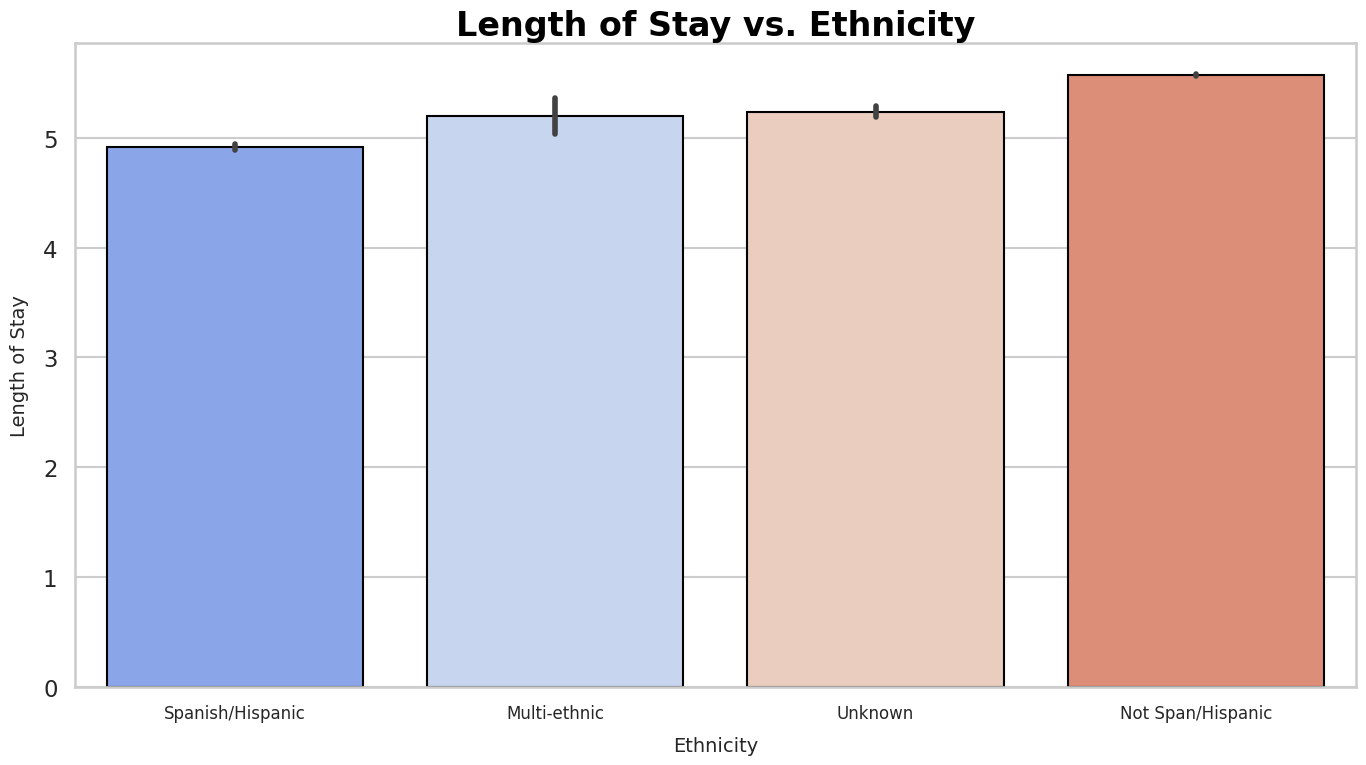

In [15]:
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
sns.set_context("talk")

ethnicity_group_order = ["Spanish/Hispanic", "Multi-ethnic", "Unknown", "Not Span/Hispanic"]
ethnicity_length_of_stay_chart = sns.barplot(
    data=df2, 
    x="Ethnicity", 
    y="Length of Stay", 
    palette="coolwarm", 
    edgecolor="black",
    order=ethnicity_group_order
)

plt.title("Length of Stay vs. Ethnicity", fontsize=24, fontweight='bold', color='black')
plt.xlabel("Ethnicity", fontsize=14, labelpad=10)
plt.ylabel("Length of Stay", fontsize=14, labelpad=10)

plt.xticks(rotation=0, fontsize=12)

for p in ethnicity_length_of_stay_chart.patches:
    if p.get_height() > 0:
        ethnicity_length_of_stay_chart.annotate(
            format(p.get_height(), ".0f"),
            (p.get_x() + p.get_width() / 2., p.get_height() + 500),
            ha="center", va="bottom",
            fontsize=12, color="black"
        )

plt.savefig("length_of_stay_ethnicity.png")
plt.tight_layout()
plt.show()

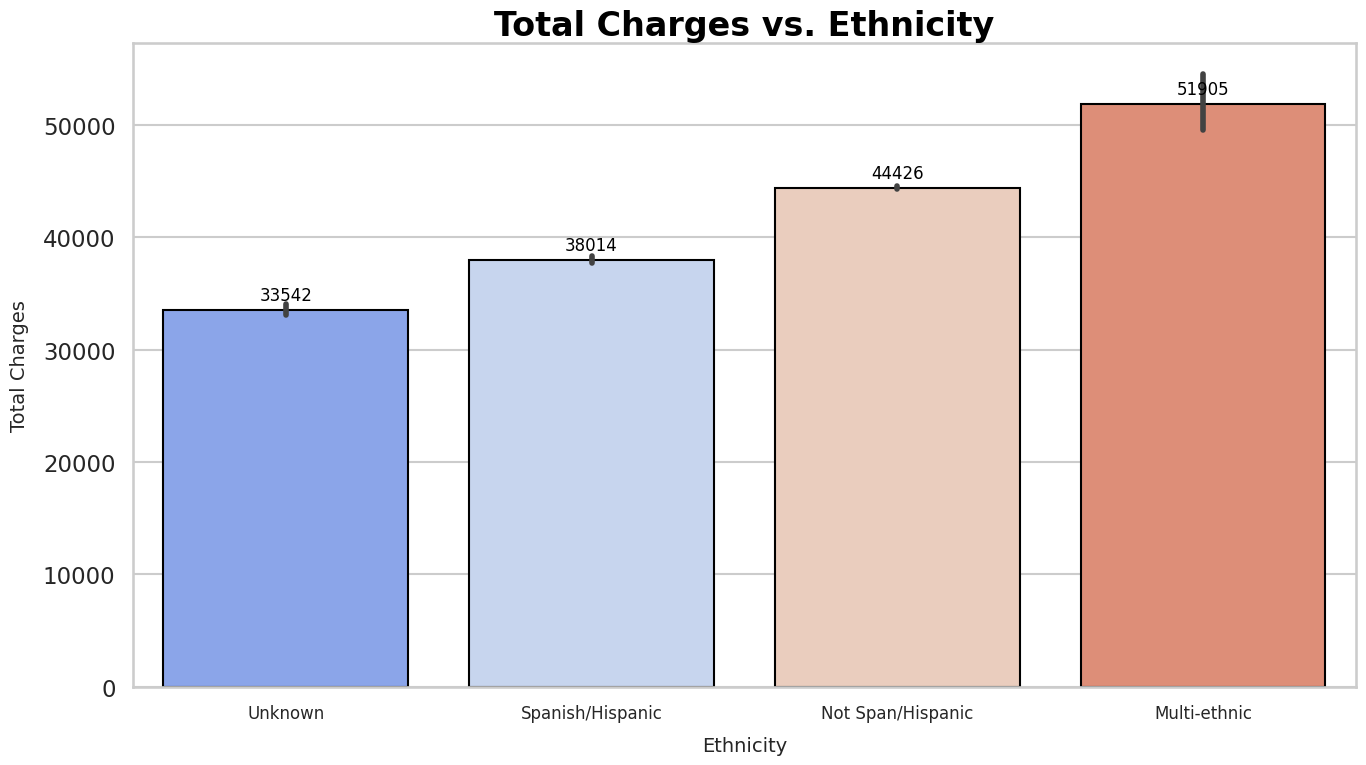

In [16]:
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
sns.set_context("talk")

ethnicity_group_order = ["Unknown", "Spanish/Hispanic", "Not Span/Hispanic", "Multi-ethnic"]
ethnicity_total_charge_chart = sns.barplot(
    data=df2, 
    x="Ethnicity", 
    y="Total Charges", 
    palette="coolwarm", 
    edgecolor="black",
    order=ethnicity_group_order
)

plt.title("Total Charges vs. Ethnicity", fontsize=24, fontweight='bold', color='black')
plt.xlabel("Ethnicity", fontsize=14, labelpad=10)
plt.ylabel("Total Charges", fontsize=14, labelpad=10)

plt.xticks(rotation=0, fontsize=12)

for p in ethnicity_total_charge_chart.patches:
    if p.get_height() > 0:
        ethnicity_total_charge_chart.annotate(
            format(p.get_height(), ".0f"),
            (p.get_x() + p.get_width() / 2., p.get_height() + 500),
            ha="center", va="bottom",
            fontsize=12, color="black"
        )

plt.savefig("total_charges_ethnicity.png")
plt.tight_layout()
plt.show()

## Build model

In [19]:
# Y - Feature to predict (charges)
# X - Features used to predict Y (rest of the columns)
Y = df3["Total Charges"]
X = df3.drop("Total Charges", axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Create model and train
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# Predict on Training Data
Y_pred_train = regressor.predict(X_train)

#Predict on Test Data
Y_pred_test = regressor.predict(X_test)

In [ ]:
#Prediction on training data (model has seen this before)
pd.DataFrame({"Model Prediction": Y_pred_train,
             "Expected/Real values": Y_train}).head(10)

In [ ]:
#Prediction on test data (model has not seen this before)
pd.DataFrame({"Model Prediction": Y_pred_test,
             "Expected/Real values": Y_test}).head(10)

In [ ]:
#MSE for predictions on train data
mean_absolute_error(Y_train, Y_pred_train)

In [ ]:
#MSE for predictions on test data
mean_absolute_error(Y_test, Y_pred_test)

## Visualize Real vs. Prediction

In [ ]:
testDF = pd.DataFrame({"Model Prediction": Y_pred_test,
             "Expected/Real values": Y_test})

#sns.scatterplot(data=testDF, x="Expected/Real values", y="Model Prediction")

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.set_context("talk")

scatter_plot = sns.scatterplot(
    data=testDF, x="Expected/Real values", y="Model Prediction", palette="coolwarm", color="#4682B4", s=100, alpha=0.6
)

plt.title("Expected Values vs. Predicted Values", fontsize=24, fontweight="bold", color="black")
plt.xlabel("Expected Values", fontsize=14, labelpad=10)
plt.ylabel("Predicted Values", fontsize=14, labelpad=10)

plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig("expected_values_predicted_values.png")
plt.tight_layout()
plt.show()